In [285]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df2 = pd.read_csv('user_data.csv')

In [38]:
df

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [40]:
df2

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [36]:
df.platform.value_counts()

platform
phone       2753
computer    1505
tablet       242
Name: count, dtype: int64

In [88]:
success_true = df.query('success == True') \
    .groupby('client', as_index = False) \
    .agg({'time': 'count'}) \
    .sort_values('time', ascending = False)

In [90]:
success_true

,client,time
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [122]:
max_count = success_true['time'].max()

In [130]:
top_clients = success_true \
    .query('time == @max_count') \
    .sort_values('client') 

In [155]:
', '.join(str(c) for c in top_clients['client'])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

In [159]:
merged = df.merge(df2, on = 'client')

In [171]:
merged.query('premium == True').platform.value_counts()

platform
phone       246
computer    150
tablet       24
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

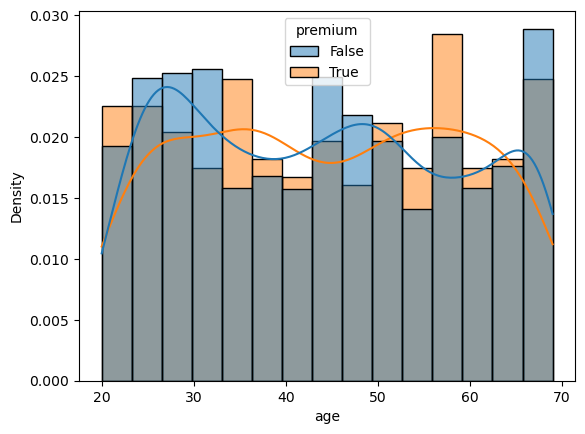

In [289]:
sns.histplot(x = 'age', hue = 'premium', kde = True, stat='density', common_norm = False, data = merged)

In [225]:
distribution = success_true['time'].value_counts().sort_index().reset_index()

In [227]:
distribution

,time,count
0,1,2791
1,2,43
2,3,1
3,40,1
4,41,9


<Axes: xlabel='time', ylabel='count'>

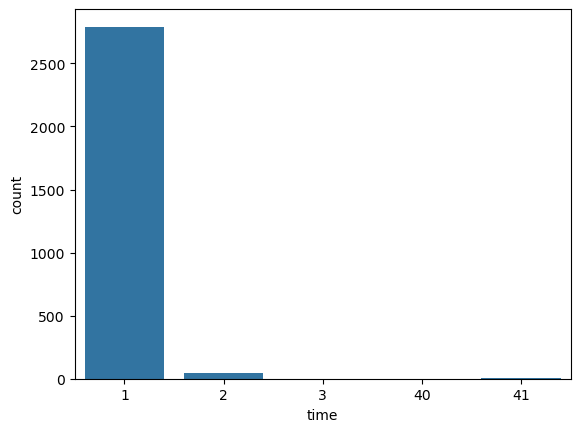

In [229]:
sns.barplot(x = 'time', y = 'count', data = distribution)

In [263]:
comp_success_true = success_true.merge(df, on = 'client').query('platform == "computer"')

In [267]:
comp_success_true_age = comp_success_true.merge(df2, on = 'client')

In [269]:
comp_success_true_age

,client,time_x,success,platform,time_y,premium,age
0,12179,41,True,computer,1585412991,False,32
1,12179,41,True,computer,1585472414,False,32
2,12179,41,True,computer,1585404086,False,32
3,12179,41,True,computer,1585457851,False,32
4,12179,41,True,computer,1585419765,False,32
...,...,...,...,...,...,...,...
845,33625,1,True,computer,1585413360,True,65
846,33977,1,True,computer,1585403028,False,65
847,33980,1,True,computer,1585427662,False,54
848,34191,1,True,computer,1585466832,False,36


C:\Users\milan\AppData\Local\Temp\ipykernel_13228\1902214081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age', data=comp_success_true_age, palette='viridis')


<Axes: xlabel='age', ylabel='count'>

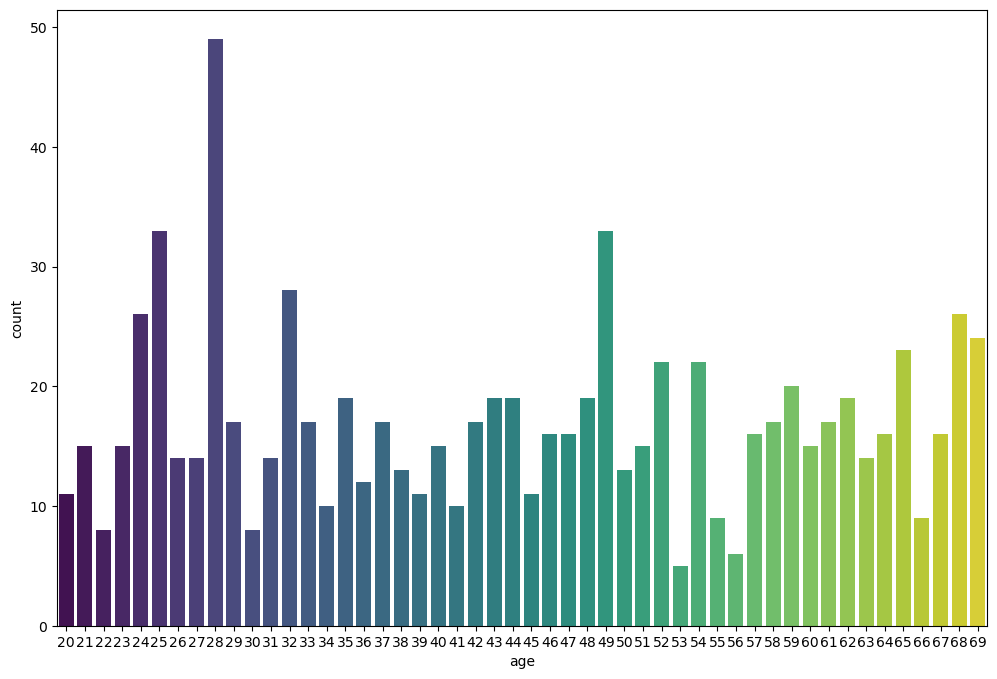

In [287]:
plt.figure(figsize=(12, 8))
sns.countplot(x='age', data=comp_success_true_age, palette='viridis')